<a href="https://colab.research.google.com/github/taropafadzw/in-god-i-trust/blob/master/finalmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pwd

/content


In [2]:
!mkdir myproject

In [3]:
cd /content/myproject/

/content/myproject


In [ ]:
!ls

In [5]:
import keras
from keras import backend as K
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input
import numpy as np
from IPython.display import Image
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:
train_path = "/content/drive/My Drive/flowers/traini"
test_path = "/content/drive/My Drive/flowers/test"
valid_path = "/content/drive/My Drive/flowers/valid"

In [8]:
train_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)   

Found 3022 images belonging to 5 classes.
Found 800 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [9]:
mobile = keras.applications.mobilenet.MobileNet()
mobile.summary()

17227776/17225924 [==============================] - 2s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________

In [10]:
x = mobile.layers[-6].output

In [11]:
output = Dense(units=5, activation='softmax')(x)

In [12]:
model = Model(inputs=mobile.input, outputs=output)

In [13]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [14]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128 

In [15]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=30, verbose=2)

Epoch 1/30
 - 2211s - loss: 0.5400 - accuracy: 0.8087 - val_loss: 0.9809 - val_accuracy: 0.8200
Epoch 2/30
 - 286s - loss: 0.2471 - accuracy: 0.9133 - val_loss: 0.9383 - val_accuracy: 0.8138
Epoch 3/30
 - 289s - loss: 0.1543 - accuracy: 0.9563 - val_loss: 1.0789 - val_accuracy: 0.8213
Epoch 4/30
 - 286s - loss: 0.1228 - accuracy: 0.9567 - val_loss: 0.2484 - val_accuracy: 0.8075
Epoch 5/30
 - 290s - loss: 0.1019 - accuracy: 0.9739 - val_loss: 0.3705 - val_accuracy: 0.7375
Epoch 6/30
 - 288s - loss: 0.0747 - accuracy: 0.9798 - val_loss: 0.4811 - val_accuracy: 0.8000
Epoch 7/30
 - 291s - loss: 0.0637 - accuracy: 0.9828 - val_loss: 1.5275 - val_accuracy: 0.7962
Epoch 8/30
 - 288s - loss: 0.0633 - accuracy: 0.9841 - val_loss: 1.1856 - val_accuracy: 0.7700
Epoch 9/30
 - 291s - loss: 0.0458 - accuracy: 0.9854 - val_loss: 1.5888 - val_accuracy: 0.8225
Epoch 10/30
 - 286s - loss: 0.0366 - accuracy: 0.9914 - val_loss: 0.9733 - val_accuracy: 0.7937
Epoch 11/30
 - 290s - loss: 0.0254 - accuracy: 0

In [17]:
test_labels = test_batches.classes

In [18]:
predictions = model.predict(x=test_batches, verbose=0)

In [19]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [20]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [21]:
test_batches.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

Confusion matrix, without normalization
[[97  1  1  0  1]
 [ 4 91  3  2  0]
 [ 0  0 99  0  1]
 [ 2  3  5 88  2]
 [ 1  1  6  1 91]]


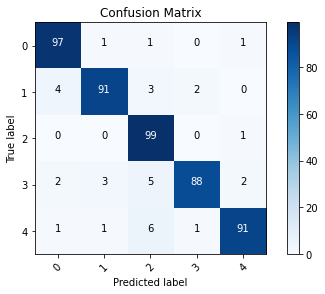

In [22]:
cm_plot_labels = ['0','1','2','3','4']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [23]:
model.save('flowerclassify_model.h5')

In [24]:
from keras.models import load_model
new_model = load_model('flowerclassify_model.h5')

In [25]:
new_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128 